## Predicting Employee Attrition Rate

_Author **Shereef Bankole**_
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6">Here<a/>

**For the source of the data click** <a href="https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset">Here<a/>

### Problem statement
This project is to find out the factors that contribute to ineffectiveness of employees (attrition), as this can to lead turnover i.e the situation whereby an employee leaves their job. Attrition problem is peculiar to all businesses be it small, medium or large scale business. Hence, there is need to understand its drivers in order to prevent distruption of businesses. Predicting the possibility of an employee quiting their jobs is cost effective and adquate measures can be put in place by the HR in order to prevent it. Here classification models were used to predict the possibility of some employees quiting their jobs using IBM HR Analytics Data

The project will address the followings:

1. Exploration data analysis
2. Model development, prediction and model evaluation
3. Retention strategies
4. Conclusion

In [46]:
from google.colab import files
uploaded = files.upload()

### Import required packages for data visualisation

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Data

In [47]:
raw_data=pd.read_csv('IBM_HR_Employee_Attrition.csv')
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [24]:
raw_data.shape

(1470, 35)

In [26]:
raw_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

### Data Inspection

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [0]:
#Checking the number of dataset i.e the employees
raw_data.shape

(1470, 35)

In [29]:
#checking for missing values
raw_data.isnull().sum().sort_values(ascending=False).head()

YearsWithCurrManager    0
EmployeeCount           0
JobLevel                0
JobInvolvement          0
HourlyRate              0
dtype: int64

In [0]:
#!pip install missingno
#import missingno as msno
#msno.bar(raw_data)#missing number

In [0]:
#Checking that all column headings are string
all(isinstance(column, str) for column in raw_data.columns)

True

In [30]:
# Revealing the attrition rate in the data
Attrition_rate = raw_data.Attrition.value_counts() / 1470
print('Attrition_rate is: ', Attrition_rate)

Attrition_rate is:  No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [31]:
raw_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [0]:
raw_data.Attrition.tail()

1465    No
1466    No
1467    No
1468    No
1469    No
Name: Attrition, dtype: object

In [33]:
#Use the describe method to get a summary statistics on numeric variables
raw_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [34]:
#Summary statistics on categorical variable
raw_data.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [35]:
#Summary mean of employees grouped by attrition
Attrition_summary= raw_data.groupby('Attrition').mean()
Attrition_summary

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [49]:
#raw_data_1 = raw_data.copy()
raw_data_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [50]:
#Change Attrition column values to numeric values
attrition={'Yes':1, 'No':0}
#raw_data.Attrition=[attrition[item] for item in raw_data.Attrition]
raw_data.Attrition=raw_data.Attrition.map(lambda x:attrition[x])
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Correlation Matrix

In [0]:
corr_features=raw_data.corr()
corr_features.iloc[:,0]

Age                         1.000000
Attrition                  -0.159205
DailyRate                   0.010661
DistanceFromHome           -0.001686
Education                   0.208034
EmployeeCount                    NaN
EmployeeNumber             -0.010145
EnvironmentSatisfaction     0.010146
HourlyRate                  0.024287
JobInvolvement              0.029820
JobLevel                    0.509604
JobSatisfaction            -0.004892
MonthlyIncome               0.497855
MonthlyRate                 0.028051
NumCompaniesWorked          0.299635
PercentSalaryHike           0.003634
PerformanceRating           0.001904
RelationshipSatisfaction    0.053535
StandardHours                    NaN
StockOptionLevel            0.037510
TotalWorkingYears           0.680381
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
YearsAtCompany              0.311309
YearsInCurrentRole          0.212901
YearsSinceLastPromotion     0.216513
YearsWithCurrManager        0.202089
N

In [0]:
def Heat_map(data, features):
    plt.figure(figsize=(20, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45) 
    plt.title('Heatmap of Correlation Matrix')

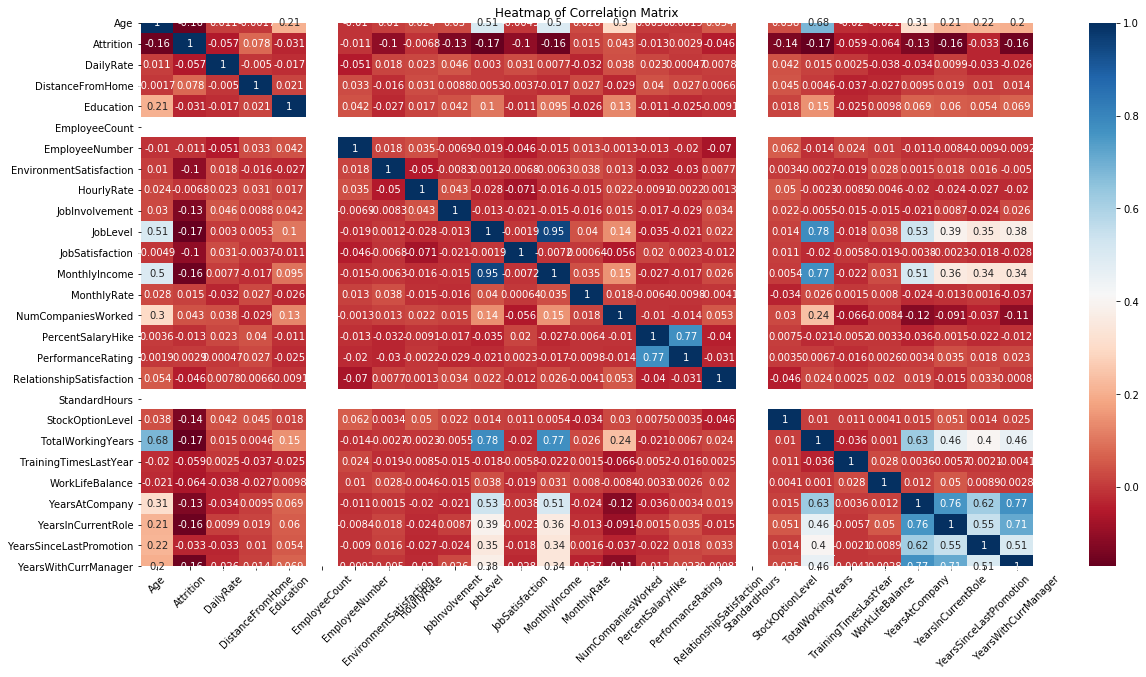

In [0]:
Heat_map(raw_data,list(raw_data.columns))

#### Based on the correlation matrix above, StandardHour and EmployeeCounts are redundant. Both have constant values

### Distribution plots of some numerical features

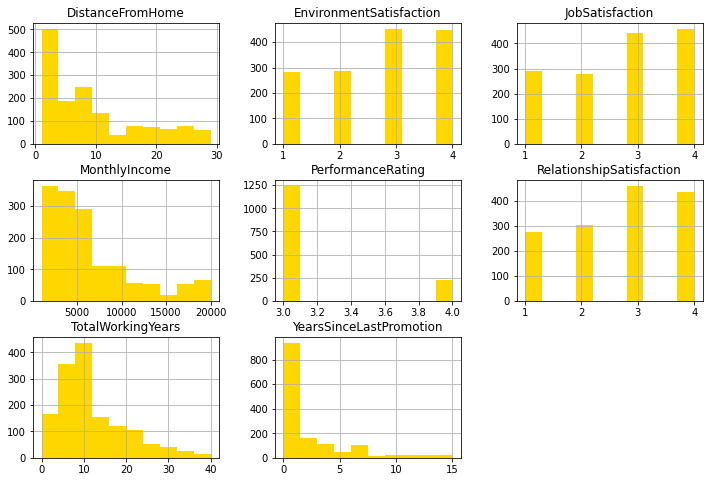

In [52]:
features=['JobSatisfaction','TotalWorkingYears','PerformanceRating','DistanceFromHome','MonthlyIncome', 'RelationshipSatisfaction','YearsSinceLastPromotion','EnvironmentSatisfaction']
raw_data[features].hist(figsize=(12,8), color='gold');

Information revealed about the employess from the distribution curves above are:
<br/> The plots above give an indication to the distribution of the workers and there grouping into 2. 
<br/>For example, considering distance from home, a large number of the employees live closer (less than 12 miles or km) compared to the other group.
<br/> Majority of the worker earn less than $1000 a month
<br/> Based on enviromental satisfaction, a group are generally satisfied whereas as the other group are not.
<br/> Workers job statisfaction as well as relatioship sataisfaction follow similar trends as environmental satisfaction
<br/> Many of the current employes have been in the complany for less than 12 years
<br/> A large number of the employees were promoted witghin the last 2 years.
<br/> All the employees received a minimum of excellent performance

### Job Satisfaction vs Performance rating

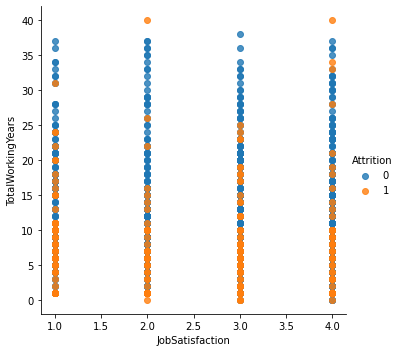

In [53]:
sns.lmplot(x="JobSatisfaction", y="TotalWorkingYears", hue="Attrition", data=raw_data, fit_reg=False);

-Employees with less than 25year of experience in the company are likely to leave

<Figure size 576x360 with 0 Axes>

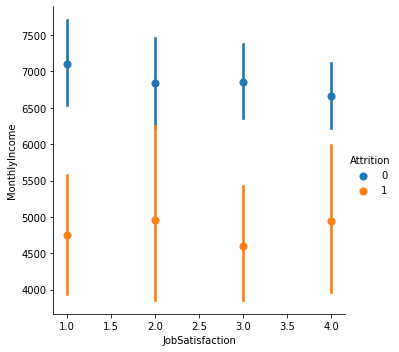

In [59]:
plt.figure(figsize=(8,5));
sns.lmplot(x="JobSatisfaction", y="MonthlyIncome", data=raw_data, x_estimator=np.mean, hue='Attrition', fit_reg=False);

- The graph shows that regardless of jobstatisfaction low income earners are likely to their jobs in comparison to higher income earners

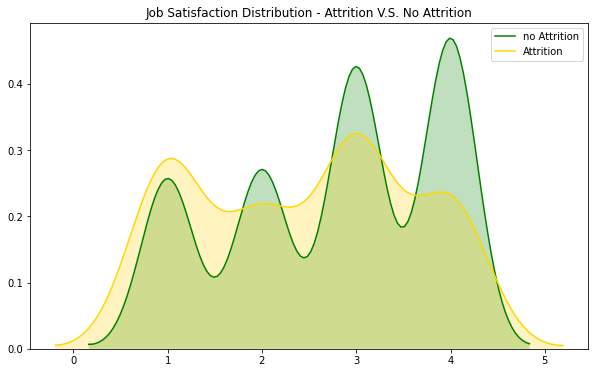

In [61]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,6))
ax=sns.kdeplot(raw_data.loc[(raw_data['Attrition'] == 0),'JobSatisfaction'] , color='green',shade=True, label='no Attrition',shade_lowest=True)
ax=sns.kdeplot(raw_data.loc[(raw_data['Attrition'] == 1),'JobSatisfaction'] , color='gold',shade=True, label='Attrition', shade_lowest=True)
plt.title('Job Satisfaction Distribution - Attrition V.S. No Attrition');

Based on the kernel density estimate graph above there are roughly two groups (**bi-modal** distribution) of employees absed on job satifaction
<br/> - Employees with low statisfaction i.e unsatisfied employees (with less than 2 statisfaction)
<br/> -Employees with more than 2.5 satisfaction

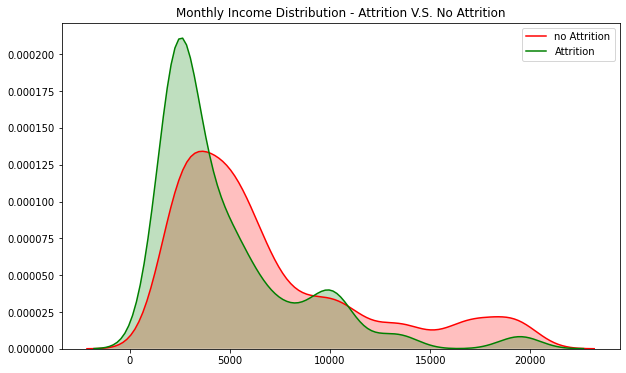

In [62]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,6))
ax=sns.kdeplot(raw_data.loc[(raw_data['Attrition'] == 0),'MonthlyIncome'] , color='red',shade=True, label='no Attrition',shade_lowest=True)
ax=sns.kdeplot(raw_data.loc[(raw_data['Attrition'] == 1),'MonthlyIncome'] , color='green',shade=True, label='Attrition', shade_lowest=True)
plt.title('Monthly Income Distribution - Attrition V.S. No Attrition');

-The kernel density estimate graph above suggests that more employees with less than $5000 monthly income are likely to leave the company.

### Job Satisfaction vs Monthly Income

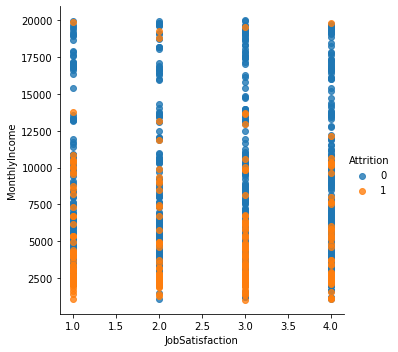

In [63]:
_=sns.lmplot(x='JobSatisfaction', y='MonthlyIncome', data=raw_data,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

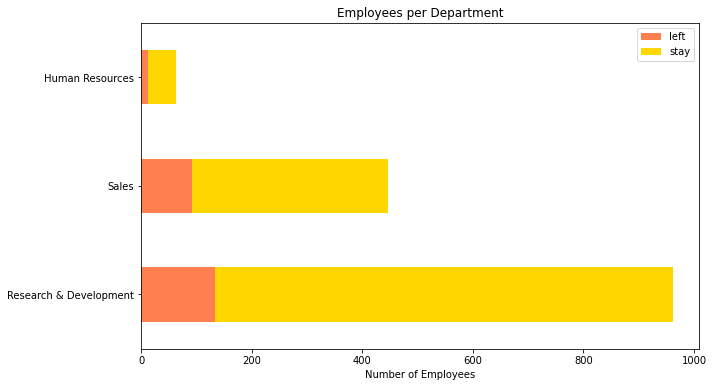

In [64]:
group_one=raw_data[['Department','Attrition']]
dept_left=group_one['Department'][group_one['Attrition']==1].value_counts()
dept_stay=group_one['Department'][group_one['Attrition']==0].value_counts()
dept_merge=pd.concat([dept_left,dept_stay], axis=1)
dept_merge.columns=['left','stay']
dept_merge.plot(kind='barh', figsize=(10, 6), color=['coral','gold'], stacked=True)
plt.xlabel('Number of Employees')
plt.title('Employees per Department');

-Most people that left the company are from research and development, followed by sales then the human resources.

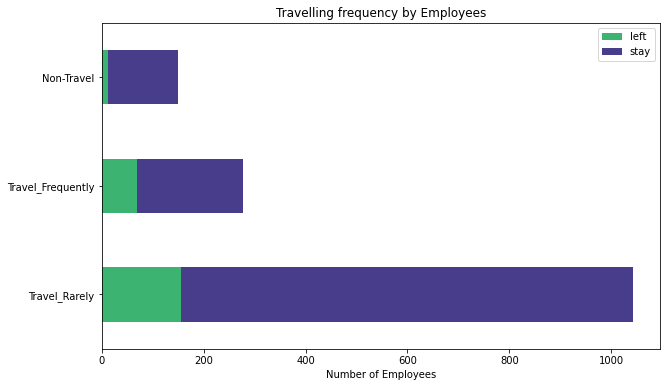

In [65]:
#group_one=raw_data[['BusinessTravel','Attrition']]
#databy_travel=group_one[group_one['Attrition']==1]
#databy_travel.BusinessTravel.value_counts().plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
group_two=raw_data[['BusinessTravel','Attrition']]
travel_left=group_two['BusinessTravel'][group_two['Attrition']==1].value_counts()
travel_stay=group_two['BusinessTravel'][group_two['Attrition']==0].value_counts()
travel_merge=pd.concat([travel_left,travel_stay], axis=1)
travel_merge.columns=['left','stay']
travel_merge.plot(kind='barh', figsize=(10, 6), color=['mediumseagreen','darkslateblue'], stacked=True)
plt.xlabel('Number of Employees')
plt.title('Travelling frequency by Employees');

In [0]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [66]:
raw_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


-Most of the people that left their jobs rarely travel
<br/>- The percentage of non-travelles that leave their jobs is very low compared to the frequent and rare travellers.

Text(0.5, 1.0, 'Travelling frequency by Employees')

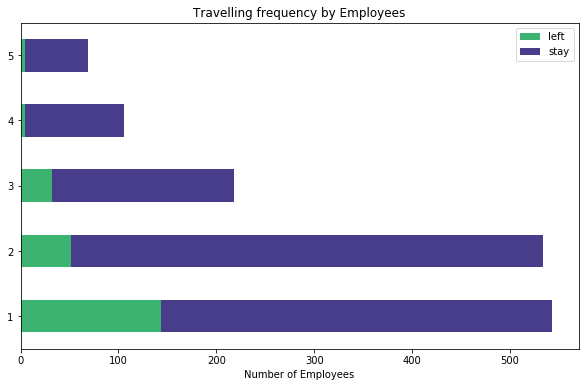

In [0]:
group_three=raw_data[['JobLevel','Attrition']]
job_left=group_three['JobLevel'][group_three['Attrition']==1].value_counts()
job_stay=group_three['JobLevel'][group_three['Attrition']==0].value_counts()
job_merge=pd.concat([job_left,job_stay], axis=1)
job_merge.columns=['left','stay']
job_merge.plot(kind='barh', figsize=(10, 6), color=['mediumseagreen','darkslateblue'], stacked=True)
plt.xlabel('Number of Employees')
plt.title('Travelling frequency by Employees')

[Text(0, 0.5, 'Percent')]

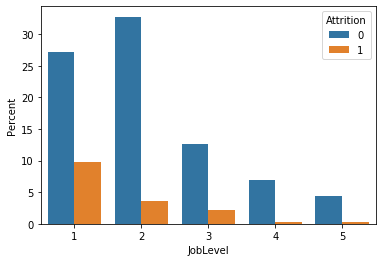

In [0]:
ax = sns.barplot(x="JobLevel", y="JobLevel", hue="Attrition", data=raw_data, estimator=lambda x: len(x) / len(raw_data) * 100)
ax.set(ylabel="Percent")

-The higher the job level the lower the attrition rate
<br/>-In every job level the ni=umber of people that stay is more than twice the people that left
<br/> The highest percenatge of people that left are in job level 1.

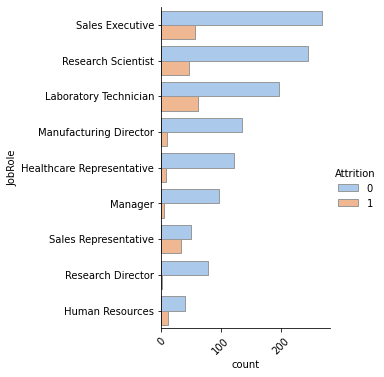

In [67]:
sns.catplot(y="JobRole", hue="Attrition", kind="count",
            palette="pastel", edgecolor=".6",
            data=raw_data);
plt.xticks(rotation=45);

-More than one third of the sale representative left their job
<br/>- Many of the employees in management roles (e.g managers and directors) are likely to stay
<br/>- About one fifth of the sale executives, research scientists, Laboratory technician and Human resources are lilely to leave. 

### Data Preprocessing

#### Onehotencoding and ordinalencoding of categorical variables

In [0]:
#from sklearn.preprocessing import OrdinalEncoder
cat_var=[]
num_var=[]
for column in raw_data:
    if raw_data[column].dtypes=='O':
        cat=column
        cat_var.append(cat)
    
    elif column=='Attrition' or column == 'BusinessTravel': continue
    
    else:
        num=column
        num_var.append(num)

categorical_df = pd.get_dummies(raw_data[cat_var], drop_first=True)
numerical_df = raw_data[num_var]
# ordinal encoding of business travel
business_travel = {'Travel_Rarely': 2, 'Travel_Frequently': 1 , 'Non-Travel':0}
raw_data['BusinessTravel'] = raw_data['BusinessTravel'].apply(lambda x: business_travel[x])

new_data = pd.concat([raw_data[['Attrition','BusinessTravel']],categorical_df,numerical_df], axis=1)
new_data.drop('StandardHours', axis=1, inplace=True)# Because standardhours is unlikely to have any effect as it is constant
new_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [68]:
raw_data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [75]:
raw_data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [77]:
raw_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [71]:
raw_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Check for data imbalance

In [0]:
Attrition_rate=raw_data.Attrition.value_counts(1)
Attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

**Employee attrition rate is 16%**

Text(0.5, 1.0, 'Distribution of Attrition per Employees')

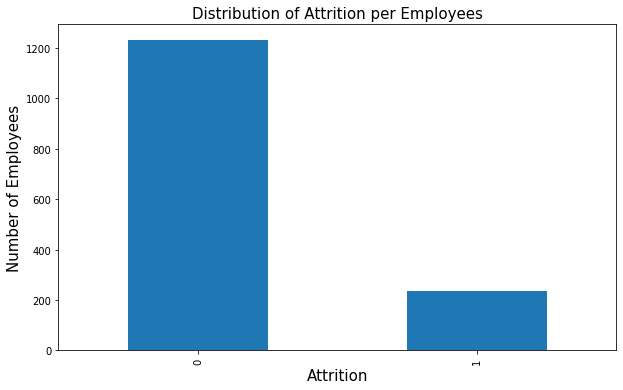

In [0]:
raw_data['Attrition'].value_counts().plot(kind='bar', figsize=(10, 6), stacked=False)
plt.xlabel('Attrition', fontsize=15)
plt.ylabel('Number of Employees', fontsize=15)
plt.title('Distribution of Attrition per Employees', fontsize=15)

-The distribution of attrition show imbalance in the sample
<br/>- To get a good result with machine learning, the samples can be undersampled or oversampled
<br/>- Here **SMOTE (Synthetic Minority Over-Sampling Technique) and the ADASYN (Adaptive Synthetic sampling method**) are used.
-<br/> Both algorith oversample the minor data click <a href="https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html">HERE</a> for more details.

In [0]:
ft=new_data.iloc[:,1:]

### Train Test Split and Standardization

In [0]:
scaler= StandardScaler()
# Create the feature and target set
features = new_data.iloc[:,1:]
target  = new_data.iloc[:,0]

features= scaler.fit_transform(features)
#only the features were standardized

# Define train and test
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.30, random_state=123, stratify=target)


In [0]:
new_data.iloc[:,1:].head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


### Oversampling using SMOTE and ADASYN

In [0]:
#from sklearn.utils import resample
!pip install imblearn
from imblearn.over_sampling import SMOTE,ADASYN 

# Upsample using SMOTE
sm = SMOTE(random_state=12)
ads=ADASYN(random_state=12,)
features_train_sm, target_train_sm = sm.fit_sample(features_train, target_train)
features_train_ads, target_train_ads = ads.fit_sample(features_train, target_train)
print('The oversampled training features shape are: {} for the features and {} for the targets: ' .format(features_train_sm.shape, target_train_sm.shape))

The oversampled training features shape are: (1726, 46) for the features and (1726,) for the targets: 


In [0]:
# Create the Original and oversampled (SMOTE and ADASYN)  training sets
data_dict = {"Original": (features_train, target_train),
                "SMOTE": (features_train_sm, target_train_sm),
                "ADASYN":(features_train_ads, target_train_ads)}

# Loop through each of training sets and apply 10-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in data_dict.keys():
    lr_scores = cross_val_score(LogisticRegression(), data_dict[method][0], data_dict[method][1], cv=10, scoring='f1')
    print("\nThe best F1 Score for {method} data is:")
    print (lr_scores.mean())


The best F1 Score for {method} data is:
0.4972051627697514

The best F1 Score for {method} data is:
0.8063729524005996

The best F1 Score for {method} data is:
0.7590943407743385


**Since the F1 score for SMOTE is slightly better than ADASYN, the next step is to train 4 chosen models using SMOTE**

### Train 3 Models
1. Logistic Regression
2. Random Forest
3. Gradientboosting

### Hyperparameter tunning using Grid Search

In [0]:
#Getting the best hyperparameter for logistic regression
lr= LogisticRegression()

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]

param_grid=dict(dual=dual, max_iter=max_iter, C=C)

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1)

grid_search=grid_search.fit(features_train_sm, target_train_sm)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))


Best: 0.802470 using {'C': 1.0, 'dual': False, 'max_iter': 100}


In [0]:
#Getting the best hyperparameter for random forest
rf = RandomForestClassifier(random_state=12)

n_estimators=np.arange(10,150,10)
max_features=['auto', 'sqrt']
max_depth= np.arange(5,55,10)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
bootstrap=[True,False]

param_grid_rf = dict(n_estimators=n_estimators, max_features=max_features,max_depth=max_depth,bootstrap=bootstrap) #min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf , cv = 10)

grid_search_rf=grid_search_rf.fit(features_train_sm, target_train_sm)

print("Best: %f using %s" % (grid_search_rf.best_score_, grid_search_rf.best_params_))

Best: 0.946774 using {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'n_estimators': 70}


In [0]:
#Getting the best hyperparameter for gradient boosting
gbt = GradientBoostingClassifier(random_state=12)

n_estimators=np.arange(10,150,10)
max_features=['auto', 'sqrt']
loss=['deviance', 'exponential']
max_depth= np.arange(5,55,10)

param_grid_gbt = dict(n_estimators=n_estimators, max_features=max_features,max_depth=max_depth) #min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

grid_search_gbt = GridSearchCV(gbt, param_grid=param_grid_gbt , cv = 10)

grid_search_gbt=grid_search_gbt.fit(features_train_sm, target_train_sm)

print("Best: %f using %s" % (grid_search_gbt.best_score_, grid_search_gbt.best_params_))

Best: 0.942149 using {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 30}


###  Model  Logistic Regression using the best hyperparameters


In [0]:
#Logistic Regression Model
#lr = LogisticRegression(C=1.0, dual=False, max_iter= 100)

#lr_scores = cross_val_score(lr, features_train_sm, target_train_sm, cv=10, scoring='f1')

#print('The mean f1 score for random forest model is: ', lr_scores.mean())

In [0]:
lr = LogisticRegression(C=1.0, dual=False, max_iter= 100)

lr = lr.fit(features_train_sm, target_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(target_test, lr.predict(features_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(features_train_sm, target_train_sm)
print(classification_report(target_test, lr.predict(features_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.76
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       370
           1       0.39      0.75      0.51        71

    accuracy                           0.77       441
   macro avg       0.67      0.76      0.68       441
weighted avg       0.85      0.77      0.80       441



### Random Forest Model using the best hyperparameters Score (0.95)

In [0]:
rf = RandomForestClassifier(n_estimators=70, max_features='auto',max_depth=15,bootstrap=False, random_state=12)

#Fit the model to the oversampled data
rf = rf.fit(features_train_sm, target_train_sm)

print ("\n\n ---Random Forest Model---")
rf_auc = roc_auc_score(target_test, rf.predict(features_test))

print ("Random Forest AUC = %2.2f" % rf_auc)

print(classification_report(target_test, rf.predict(features_test)))



 ---Random Forest Model---
Random Forest AUC = 0.66
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       370
           1       0.83      0.34      0.48        71

    accuracy                           0.88       441
   macro avg       0.86      0.66      0.71       441
weighted avg       0.88      0.88      0.86       441



### Gradient Boosting using the best hyperparameters Score (0.94)

In [0]:
gbt = GradientBoostingClassifier(max_depth= 25, max_features= 'sqrt', n_estimators=30, random_state=12)


# Fit the model to the oversampled data
gbt = gbt.fit(features_train_sm, target_train_sm)

print ("\n\n ---Gradient Boosting Model---")
gbt_auc = roc_auc_score(target_test, gbt.predict(features_test))

print ("Gradient Boosting AUC = %2.2f" % gbt_auc)

gbt2 = gbt.fit(features_train_sm, target_train_sm)

print(classification_report(target_test, gbt.predict(features_test)))



 ---Gradient Boosting Model---
Gradient Boosting AUC = 0.64
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.75      0.30      0.42        71

    accuracy                           0.87       441
   macro avg       0.81      0.64      0.68       441
weighted avg       0.86      0.87      0.85       441



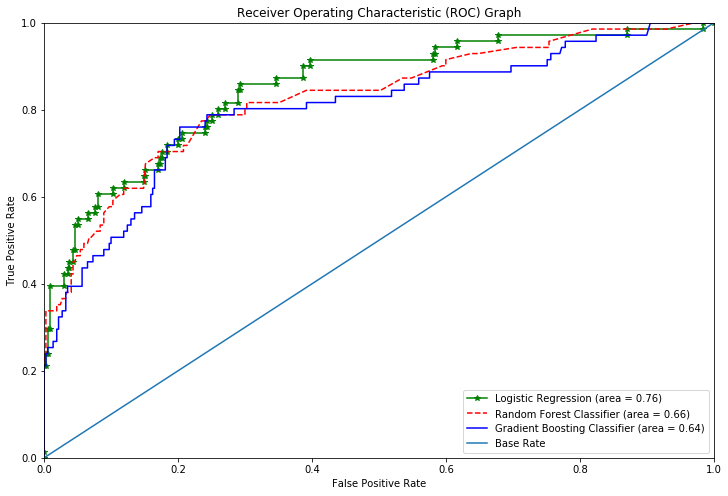

In [0]:
# Create ROC Graph
lr_fpr, lr_tpr, lr_thresholds = roc_curve(target_test, lr.predict_proba(features_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(target_test, rf.predict_proba(features_test)[:,1])
gbt_fpr, gbt_tpr, gbt_thresholds = roc_curve(target_test, gbt.predict_proba(features_test)[:,1])


plt.figure(figsize=(12,8)) #dpi=150)

# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr,'g*-', label='Logistic Regression (area = %0.2f)' % lr_auc)

#plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr,'r--', label='Random Forest Classifier (area = %0.2f)' % rf_auc)

# Plot Gradient Boosting ROC
plt.plot(gbt_fpr, gbt_tpr,'b', label='Gradient Boosting Classifier (area = %0.2f)' % gbt_auc)

#Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Graph')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [0]:
# Confusion Matrix for LogisticRegresion
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, lr.predict(features_test))

array([[287,  83],
       [ 18,  53]], dtype=int64)

In [0]:
# Confusion Matrix for Random forest
confusion_matrix(target_test, rf.predict(features_test))

array([[365,   5],
       [ 47,  24]], dtype=int64)

In [0]:
# Confusion Matrix for Gradientboosting forest
confusion_matrix(target_test, gbt.predict(features_test))

array([[363,   7],
       [ 50,  21]], dtype=int64)

### Random Forest Feature Importances

In [0]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = ft.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,OverTime_Yes,0.091122
1,StockOptionLevel,0.070584
2,TotalWorkingYears,0.053718
3,JobSatisfaction,0.051562
4,JobInvolvement,0.040397
5,MaritalStatus_Single,0.040142
6,MonthlyIncome,0.040037
7,YearsAtCompany,0.039323
8,RelationshipSatisfaction,0.036921
9,YearsWithCurrManager,0.033901


Text(0.5, 1.0, 'Feature importances')

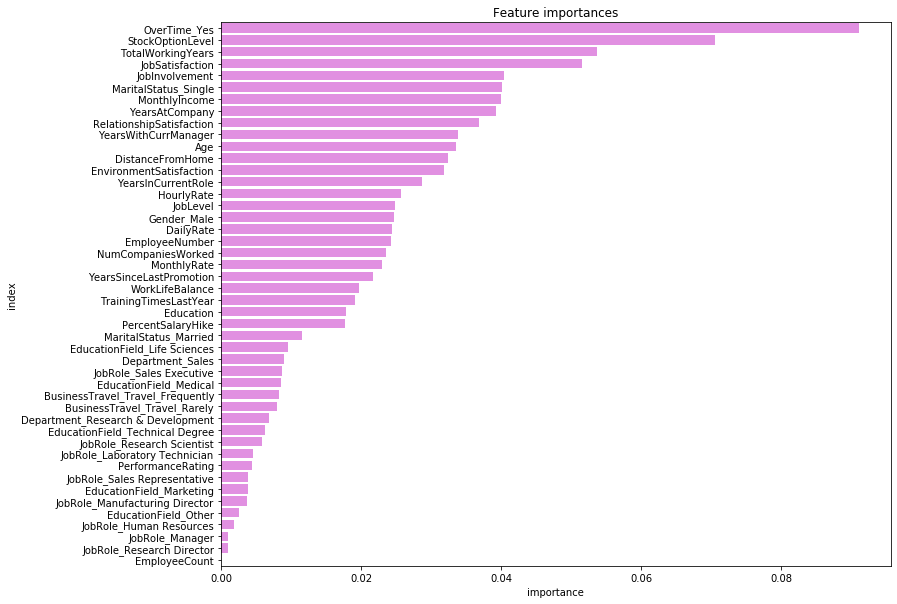

In [0]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Plot the Feature Importances
sns.set_color_codes("pastel")
sns.barplot(x="importance", y="index", data=feature_importances,
            label="Total", color="violet")
plt.title('Feature importances')

In [0]:
target_test

900     0
964     0
454     0
76      0
462     0
1071    0
572     0
267     0
907     0
438     0
946     1
956     0
271     1
338     0
623     0
456     0
1445    0
19      0
627     0
1249    1
710     0
839     0
1082    0
136     1
1395    1
657     0
84      0
138     0
491     0
642     0
996     0
1290    1
1172    0
1235    0
569     0
161     0
669     1
393     0
1119    0
1392    0
562     1
10      0
1171    1
1061    0
1065    0
1038    0
1115    0
1223    1
809     0
332     0
1192    0
447     0
21      1
497     0
836     1
31      0
282     0
523     0
885     0
1197    0
584     0
425     0
923     0
1027    0
1132    0
837     0
551     0
381     0
884     0
1062    0
616     0
397     0
59      0
102     1
8       0
231     0
1449    0
327     1
1003    0
478     0
1301    0
135     0
1060    1
1098    0
367     0
92      0
683     1
169     0
651     0
1388    0
1045    0
537     0
1432    0
52      0
159     0
595     1
597     0
198     0
649     0
829     1


In [0]:
Attrition_prob=pd.DataFrame(rf.predict_proba(features_test),index=target_test.index, columns=["Attrition", "No_Attrition"]).sort_values(by='Attrition',ascending=False)
Attrition_prob

,Attrition,No_Attrition
1299,1.000000,0.000000
699,1.000000,0.000000
257,0.985714,0.014286
765,0.985714,0.014286
1441,0.985714,0.014286
584,0.985714,0.014286
1179,0.985714,0.014286
787,0.985714,0.014286
558,0.985714,0.014286
593,0.980952,0.019048


### Retention Plan
- The probablity of employees attrition handy to work with
<br/>- Based on the proability employees can be grouped into classes:
<br/>- **Low Risk** i.e employees that are very unlikely to stay.
<br/>- **Medium Risk** -employeess that are likely to leave.
<br/>- **High Risk** -employees that are very likely to leave.

Based on the above, adequate incentive might be put inplace based where an an employee falls into within the group

### Conclusion

-Here predictive model of employee attrition is presented.
<br/>- Key observations made during the exploration data analysis are:
<br/>- Low income earners (less than $ 12000) are verly likey to leave
<br/>- There is a negative correlation between job level and attrition
<br/>- Interms of job level, many sale exceutives, research scientists and laboratory technicians left compared to others.
<br/>- Random forest has the best prediction (0.83) whhich is a meteric evaluation better than recall for employee attrition
<br/>- Logistic regression has best RoC value (0.76)
<br/>-The model predicted correctly more of employees that are likely to stay
<br/>-The model is simple, but it can be improved by:
    <br/>- **Gathering more data**
    <br/>- **Tunning the hyperperameters of the models**
    <br/>- **Using the feature importances generated here to discard redundant features**
